In [1]:
import tensorflow as tf
import os
import numpy as np
import cv2
import imghdr
from matplotlib import pyplot as plt
from deepface import DeepFace


/var/folders/m0/jjv4qpb14dnb85vzc2fkwbhc0000gn/T/ipykernel_49944/54266858.py:5: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
TRAINING_RATE = 70
VAL_RATE = 20
TEST_RATE = 10

In [3]:
data_dir = 'data'
image_extensions = ['jpeg', 'jpg', 'png','bmp']
logdir = 'logs'

In [4]:
for image_class in os.listdir('data'):
    print(image_class)

.DS_Store
with_mask
without_mask


In [5]:
for image_class in os.listdir('data'):
    if os.path.isdir(os.path.join(data_dir, image_class)):
        for image in os.listdir(os.path.join(data_dir, image_class)):
            image_path = os.path.join('data', image_class, image)

            try:
                img = cv2.imread(image_path)
                type_img = imghdr.what(image_path)
                if type_img not in image_extensions:
                    print(f'Image {image_path} is not a valid image')
                    os.remove(image_path)
            except Exception as e:
                print(f'Image {image_path} is not a valid image')
                os.remove(image_path)
                

In [6]:
# for image_class in os.listdir('data'):
#     if os.path.isdir(os.path.join(data_dir, image_class)):
#         for image in os.listdir(os.path.join(data_dir, image_class)):
#             image_path = os.path.join('data', image_class, image)
#             img = cv2.imread(image_path)
#             try:
#                 faces = DeepFace.extract_faces(img, target_size=(256,256), detector_backend = 'opencv')
            
#             except:
#                 print(f'Error processing image {image_path}')
#                 os.remove(image_path)
#                 continue
                              
#             cv2.imwrite(image_path, faces[0]['face'])


                            

In [6]:

data = tf.keras.utils.image_dataset_from_directory('data', batch_size=32)

Found 7551 files belonging to 2 classes.


In [7]:
# CODE 0 ==> Masked, CODE 1 ==> Unmasked
data = data.map(lambda x, y: (x/255, y))

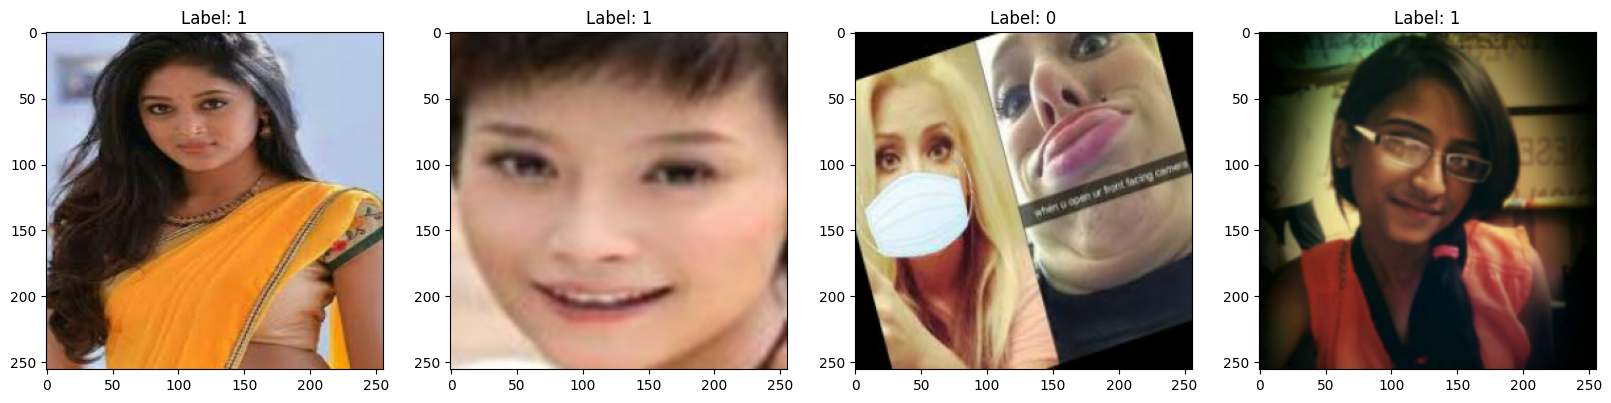

In [8]:
batch = data.as_numpy_iterator().next()
fx, ax = plt.subplots(ncols = 4, figsize=(20, 20))

for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(f'Label: {batch[1][idx]}')

In [9]:
training_size = int(len(data) * TRAINING_RATE / 100)
val_size = int(len(data) * VAL_RATE / 100)
test_size = len(data) - (training_size + val_size)

In [10]:
train = data.take(training_size)
val = data.skip(training_size).take(val_size)
test = data.skip(training_size + val_size).take(test_size)

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [12]:
model = Sequential()

In [13]:
model.add(Conv2D(16, (3, 3),1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3, 3),1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [14]:
model.compile(optimizer='adam', loss= tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

In [16]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [17]:
hist = model.fit(train, validation_data=val, epochs=10, callbacks=[tensorboard_callback])

Epoch 1/10


165/165 [==============================] - 34s 205ms/step - loss: 0.4062 - accuracy: 0.8167 - val_loss: 0.3339 - val_accuracy: 0.8677
Epoch 2/10
165/165 [==============================] - 34s 206ms/step - loss: 0.2438 - accuracy: 0.9025 - val_loss: 0.2533 - val_accuracy: 0.8996
Epoch 3/10
165/165 [==============================] - 35s 208ms/step - loss: 0.2036 - accuracy: 0.9161 - val_loss: 0.2073 - val_accuracy: 0.9189
Epoch 4/10
165/165 [==============================] - 35s 209ms/step - loss: 0.1686 - accuracy: 0.9354 - val_loss: 0.2330 - val_accuracy: 0.9149
Epoch 5/10
165/165 [==============================] - 35s 209ms/step - loss: 0.1345 - accuracy: 0.9470 - val_loss: 0.2159 - val_accuracy: 0.9202
Epoch 6/10
165/165 [==============================] - 35s 209ms/step - loss: 0.1153 - accuracy: 0.9549 - val_loss: 0.2233 - val_accuracy: 0.9235
Epoch 7/10
165/165 [==============================] - 35s 210ms/step - loss: 0.0781 - accuracy: 0.9706 - val_loss: 0.2798 - val_accuracy: 0.9

In [18]:
hist.history

{'loss': [0.4061638116836548,
  0.24384258687496185,
  0.20355698466300964,
  0.16864588856697083,
  0.1345156729221344,
  0.11527150124311447,
  0.07806932181119919,
  0.054250799119472504,
  0.03585467487573624,
  0.029582824558019638],
 'accuracy': [0.8166666626930237,
  0.9024621248245239,
  0.9160984754562378,
  0.9354166388511658,
  0.9469696879386902,
  0.9549242258071899,
  0.970643937587738,
  0.9804924130439758,
  0.9878787994384766,
  0.989962100982666],
 'val_loss': [0.33394110202789307,
  0.25328534841537476,
  0.2073454111814499,
  0.23299716413021088,
  0.21589401364326477,
  0.22330059111118317,
  0.27977946400642395,
  0.27598103880882263,
  0.3501419723033905,
  0.3093646466732025],
 'val_accuracy': [0.8676861524581909,
  0.8996010422706604,
  0.9188829660415649,
  0.914893627166748,
  0.9202127456665039,
  0.9235372543334961,
  0.9228723645210266,
  0.9315159320831299,
  0.9215425252914429,
  0.9301861524581909]}

In [19]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [20]:
pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [21]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    pre.update_state(y, yhat)
    rec.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 78ms/step


In [22]:
print('Precision:', pre.result().numpy())
print('Recall:', rec.result().numpy())
print('Accuracy:', acc.result().numpy())

Precision: 0.919598
Recall: 0.915
Accuracy: 0.91395044


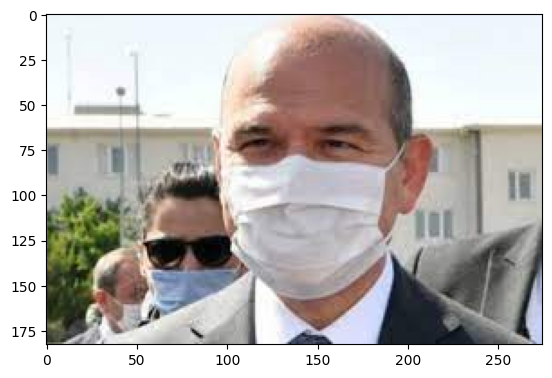

In [23]:
img = cv2.imread('download1.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

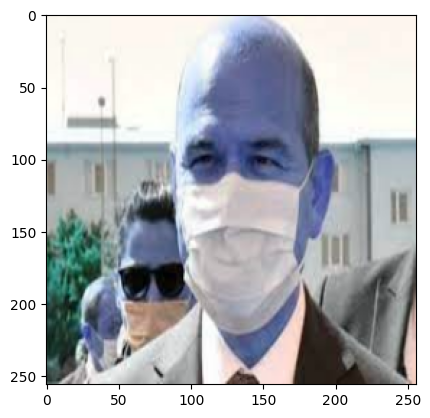

In [24]:
resize = tf.image.resize(img, (256, 256))
plt.imshow(resize.numpy().astype(int))

In [25]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [26]:
yhat

array([[0.25867644]], dtype=float32)

In [27]:
from tensorflow.keras.models import load_model

model.save('models/mask_detector.h5')